In [29]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

In [2]:
def generator2(N, m, ks):
    """
    generate the network
    :param N: number of nodes
    :param m: new node has m links
    :return:
    """

    # generate a BA network with 4000 nodes and <k> = 2m = 4
    ba = nx.barabasi_albert_graph(N, m, seed=666)

    # nodes
    nodes = [i for i in range(N)]

    # get the neighbours for each vert [(0, [1, 2]), (1, [0, 3]), (2, [0, 3]), (3, [1, 2])]
    adj = [(n, list(nbrdict.keys())) for n, nbrdict in ba.adjacency()]
    # get the degrees [(0, [1, 2]), (1, [0, 3]), (2, [0, 3]), (3, [1, 2])]
    degrees = list(ba.degree())

    identity = np.ones(N, dtype=int)
    # based on the k threshold to asign C or D
    # k >= k* will be C, otherwise will be D
    for node in range(N):
        d = degrees[node][1]
        if d > ks:
            identity[node] = 0

    return ba, adj, identity, degrees, nodes


In [3]:
def cal_gain(node, b, adj, identity):
    """
    calculate gain for the given node
    :param node: the node i
    """
    neighbours = adj[node][1]
    gain = 0
    idi = identity[node]
    for n in neighbours:
        idj = identity[n]
        if idi == idj and idi == 0:
            gain += 1
        elif idi == 1 and idj == 0:
            gain += b
    return gain


def update2(nodei, nodej, b, gains, identity, degrees):
    """
    compare nodei's gain with its neighbour nodej, and find out
    how to udpate nodei's od
    :param nodei: nodei
    :param nodej: nodej
    :return:
    """

    if gains[nodei] < gains[nodej]:
        beta = 1 / (max(degrees[nodei][1], degrees[nodei][1]) * b)
        dice = np.random.rand()
        # dice <= beta means accept
        if dice <= beta:
            identity[nodei] = identity[nodej]


def choose_neighbor(nodei, adj):
    """
    choose the node j for the node compare the gain
    :param nodei: the node we need to find a neighbour for
    :return: the neighbour chosen randomly
    """
    neighbors = adj[nodei][1]
    dice = np.random.randint(0, len(neighbors))
    return neighbors[dice]

In [13]:
# generate the b values
bs = np.arange(1, 5, 0.1)

# transient time
t0 = 500
# get steady
t1 = 100
# after steady
ts = 10000

N = 4000
m = 2


In [34]:
def iter(adj, identity, degrees, nodes, b, record, start):
    ct = [start]
    sb = time.time()
    # generate the graph
    # ba, adj, identity, degrees, nodes = generator2(N, m, k)

    # pre-evo
    for t in range(t0):
        # calculate gain
        gains = dict()
        for node in nodes:
            gains[node] = cal_gain(node, b, adj, identity)
        # update
        for node in nodes:
            nodej = choose_neighbor(node, adj)
            update2(node, nodej, b, gains, identity, degrees)
        ct.append((N - np.sum(identity)) / N)

    # get steady
    key = True
    for t in range(t1):
        oldc = N - np.sum(identity)
        # calculate gain
        gains = dict()
        for node in nodes:
            gains[node] = cal_gain(node, b, adj, identity)
        # update
        for node in nodes:
            nodej = choose_neighbor(node, adj)
            update2(node, nodej, b, gains, identity, degrees)
        newc = N - np.sum(identity)
        # find out reach steady state or not
        if key:
            if abs(newc - oldc) < 1 / np.sqrt(N):
                print(f'we have reached the steady state after {t} times evolution.')
                key = False
        ct.append((N - np.sum(identity)) / N)
    eb = time.time()

    print(f'The time we used for b = {b} is {eb - sb}s.')
    record[b] = ct

In [35]:
bs = np.arange(1.1, 1.4, 0.1)
recordk1 = dict()
k1 = 2
ba, adj, identity, degrees, nodes = generator2(N, m, k1)
start = (N - np.sum(identity))/N
for b in bs:
    adj_ = copy.deepcopy(adj)
    id_ = copy.deepcopy(identity)
    de_ = copy.deepcopy(degrees)
    nodes_ = copy.deepcopy(nodes)
    iter(adj_, id_, de_, nodes_, b, recordk1, start)

we have reached the steady state after 3 times evolution.
The time we used for b = 1.1 is 11.450469255447388s.
we have reached the steady state after 0 times evolution.
The time we used for b = 1.2000000000000002 is 14.824087619781494s.
we have reached the steady state after 0 times evolution.
The time we used for b = 1.3000000000000003 is 11.272037982940674s.


[0.50025, 0.644, 0.741, 0.79325, 0.83275, 0.86525, 0.89275, 0.90675, 0.919, 0.92325, 0.9265, 0.93375, 0.94275, 0.94675, 0.94825, 0.9535, 0.961, 0.96375, 0.9645, 0.96675, 0.96775, 0.9695, 0.9735, 0.976, 0.97875, 0.97775, 0.9785, 0.9805, 0.98125, 0.9825, 0.9835, 0.9835, 0.98525, 0.985, 0.98475, 0.98575, 0.98475, 0.9855, 0.98625, 0.98775, 0.9905, 0.99125, 0.9915, 0.99075, 0.99025, 0.99025, 0.9905, 0.99075, 0.99125, 0.9915, 0.993, 0.99375, 0.99425, 0.9945, 0.9945, 0.99475, 0.995, 0.9955, 0.9955, 0.9955, 0.996, 0.99475, 0.9945, 0.99475, 0.99575, 0.9945, 0.9955, 0.995, 0.99575, 0.99525, 0.9955, 0.99575, 0.99525, 0.99575, 0.99575, 0.99475, 0.995, 0.99625, 0.99625, 0.99625, 0.996, 0.99575, 0.99775, 0.9975, 0.9975, 0.9975, 0.99725, 0.99725, 0.9975, 0.998, 0.9975, 0.997, 0.99725, 0.997, 0.99675, 0.99725, 0.99675, 0.997, 0.997, 0.997, 0.9975, 0.99725, 0.99675, 0.99675, 0.997, 0.99675, 0.9965, 0.996, 0.9965, 0.9965, 0.99675, 0.99575, 0.996, 0.99625, 0.997, 0.9965, 0.99675, 0.9965, 0.9975, 0.9975, 

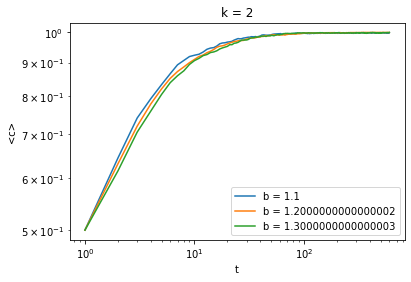

In [74]:
t = [i for i in range(1, t0+t1+2)]
for b in bs:
    print(recordk1[b])
    plt.plot(t, recordk1[b], label='b = '+str(b))
    plt.ylabel('<c>')
    plt.xlabel('t')
# plt.plot([t[0], t[-1]], [0.50025, 0.50025])
# plt.xlim(0,1000)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('k = '+str(k1))

plt.show()

In [37]:
for b in bs:
    print(recordk1[b][0])



0.50025
0.50025
0.50025


In [57]:
a = float("%.3f" % 3.111111)
print(a)

3.111
